In [40]:
import pandas as pd
import numpy as np
# Load the dataset
df = pd.read_csv('investments_VC.csv', encoding='latin1')
# Strip whitespace from column names
df.columns = df.columns.str.strip()

# Convert ' funding_total_usd ' to float
def clean_funding(value):
    try:
        # Remove any non-numeric characters (e.g., commas, symbols) and convert to float
        return float(str(value).replace(',', '').replace('$', '').strip())
    except ValueError:
        return np.nan  # Set invalid entries to NaN

df['funding_total_usd'] = df['funding_total_usd'].apply(clean_funding)
# Convert 'founded_at' to datetime, setting invalid dates to NaT (Not a Time)
df['founded_at'] = pd.to_datetime(df['founded_at'], errors='coerce')
# Check the cleaned column types and any null values
print(df[['funding_total_usd', 'founded_at']].info())

# Display a summary of NaN values in funding_total_usd
print("NaN values in funding_total_usd:", df['funding_total_usd'].isna().sum())

# Task 1: Convert specified columns to datetime format
# date_columns = [
#     'founded_at',
#     'founded_month',
#     'founded_quarter',
#     'founded_year',
#     'first_funding_at',
#     'last_funding_at'
# ]

# for col in date_columns:
#     df[col] = pd.to_datetime(df[col], errors='coerce')

# Task 2: Separate the dataframe into df_funded and df_not_funded
df_funded = df[df['funding_total_usd'].notna()]
df_not_funded = df[df['funding_total_usd'].isna()]
# Output a summary
print(f"Total rows in original dataframe: {len(df)}")
print(f"Rows in df_funded: {len(df_funded)}")
print(f"Rows in df_not_funded: {len(df_not_funded)}")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54294 entries, 0 to 54293
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   funding_total_usd  40907 non-null  float64       
 1   founded_at         38553 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1)
memory usage: 848.5 KB
None
NaN values in funding_total_usd: 13387
Total rows in original dataframe: 54294
Rows in df_funded: 40907
Rows in df_not_funded: 13387


In [41]:
df_funded.to_csv('df_funded.csv')

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54294 entries, 0 to 54293
Data columns (total 39 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   permalink             49438 non-null  object        
 1   name                  49437 non-null  object        
 2   homepage_url          45989 non-null  object        
 3   category_list         45477 non-null  object        
 4   market                45470 non-null  object        
 5   funding_total_usd     40907 non-null  float64       
 6   status                48124 non-null  object        
 7   country_code          44165 non-null  object        
 8   state_code            30161 non-null  object        
 9   region                44165 non-null  object        
 10  city                  43322 non-null  object        
 11  funding_rounds        49438 non-null  float64       
 12  founded_at            38553 non-null  datetime64[ns]
 13  founded_month   

In [43]:
df.columns.to_list()

['permalink',
 'name',
 'homepage_url',
 'category_list',
 'market',
 'funding_total_usd',
 'status',
 'country_code',
 'state_code',
 'region',
 'city',
 'funding_rounds',
 'founded_at',
 'founded_month',
 'founded_quarter',
 'founded_year',
 'first_funding_at',
 'last_funding_at',
 'seed',
 'venture',
 'equity_crowdfunding',
 'undisclosed',
 'convertible_note',
 'debt_financing',
 'angel',
 'grant',
 'private_equity',
 'post_ipo_equity',
 'post_ipo_debt',
 'secondary_market',
 'product_crowdfunding',
 'round_A',
 'round_B',
 'round_C',
 'round_D',
 'round_E',
 'round_F',
 'round_G',
 'round_H']

In [44]:
 import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Outlier Analysis for df_not_funded (based on founded_year)
q1_year = df_not_funded['founded_year'].quantile(0.25)
q3_year = df_not_funded['founded_year'].quantile(0.75)
iqr_year = q3_year - q1_year
lower_bound_year = q1_year - 1.5 * iqr_year
upper_bound_year = q3_year + 1.5 * iqr_year

df_not_funded_clean = df_not_funded[
    (df_not_funded['founded_year'] >= lower_bound_year) & 
    (df_not_funded['founded_year'] <= upper_bound_year)
]

# Outlier Analysis for df_funded (based on funding_total_usd and founded_year)
q1_funding = df_funded['funding_total_usd'].quantile(0.25)
q3_funding = df_funded['funding_total_usd'].quantile(0.75)
iqr_funding = q3_funding - q1_funding
lower_bound_funding = q1_funding - 1.5 * iqr_funding
upper_bound_funding = q3_funding + 1.5 * iqr_funding

df_funded_clean = df_funded[
    (df_funded['funding_total_usd'] >= lower_bound_funding) & 
    (df_funded['funding_total_usd'] <= upper_bound_funding)
]

# Also filter founded_year for df_funded
df_funded_clean = df_funded_clean[
    (df_funded_clean['founded_year'] >= lower_bound_year) & 
    (df_funded_clean['founded_year'] <= upper_bound_year)
]


In [67]:
def combine_categories(category):
    if '3D ' in category:
        return '3D Technologies'
    elif 'Bio ' in category:
        return 'Biotechnology'
    elif category.startswith('Cloud'):
        return 'Cloud Technologies'
    elif category.startswith('Content '):
        return 'Content Management'
    elif category.lower().startswith('data'):
        return 'Data Management'
    elif 'Energy' in category:
        return 'Energy-related Tech'
    elif 'Health ' in category:
        return 'Healthcare-associated Services'
    elif category.startswith('Internet'):
        return 'Internet-associated Technology'
    elif category.startswith('Mobile'):
        return 'Mobile Devices/Apps/Associated Business'
    elif category.startswith('Social '):
        return 'Social Media and Associated Content Management'
    else:
        return category

df_funded_clean['market'] = df_funded_clean['market'].apply(lambda x: combine_categories(x) if pd.notna(x) else x)

C:\Users\31602\AppData\Local\Temp\ipykernel_8888\1749423436.py:11: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  markets_yearly_funding.groupby('founded_year')
C:\Users\31602\AppData\Local\Temp\ipykernel_8888\1749423436.py:27: UserWarning: 
The palette list has fewer values (15) than needed (16) and will cycle, which may produce an uninterpretable plot.
  sns.lineplot(


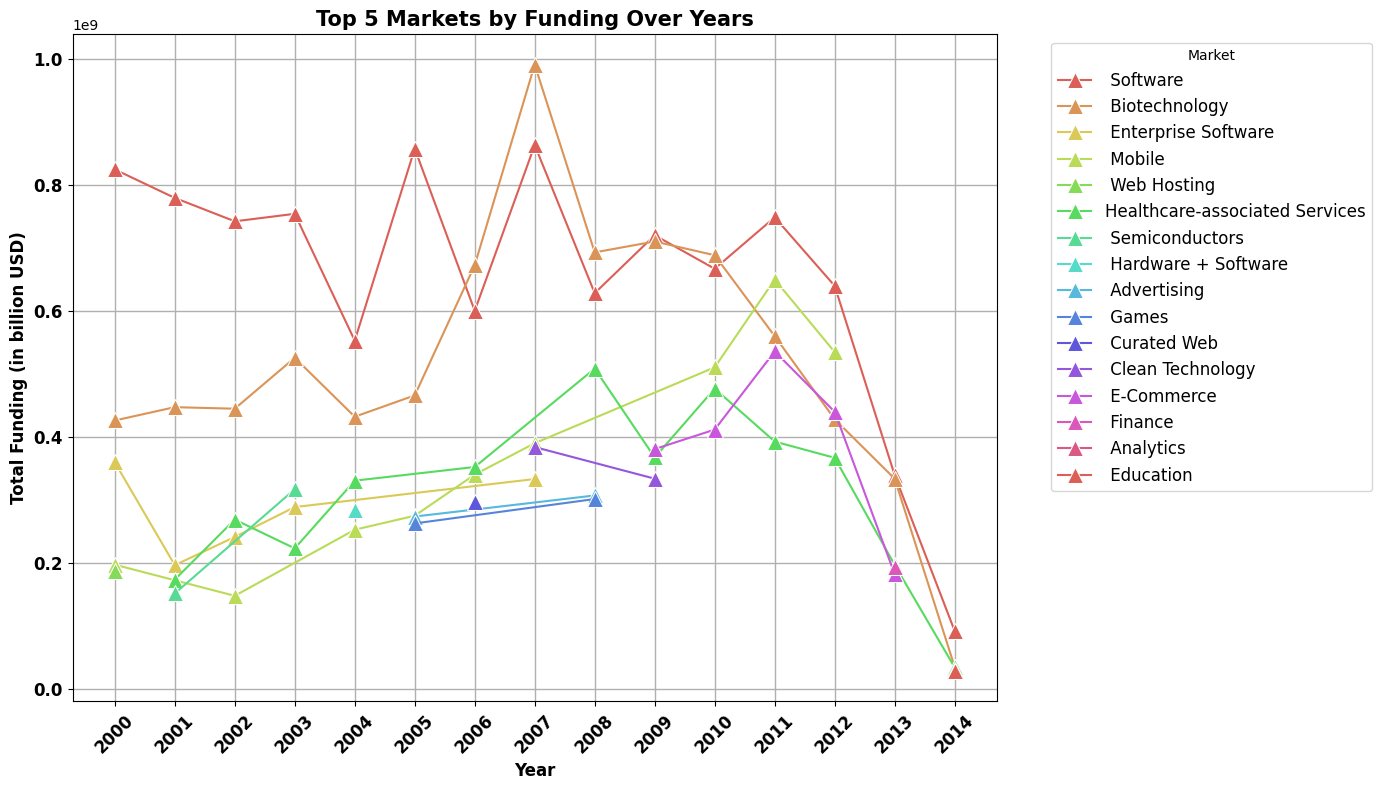

In [68]:
# Import required libraries
import matplotlib.pyplot as plt
import seaborn as sns


# Group by market and year, summing up funding_total_usd
markets_yearly_funding = df_funded_clean.groupby(['market', 'founded_year'])['funding_total_usd'].sum().reset_index()

# Identify the top 7 markets by funding for each year
top_markets_per_year = (
    markets_yearly_funding.groupby('founded_year')
    .apply(lambda x: x.nlargest(5, 'funding_total_usd'))
    .reset_index(drop=True)
)

# Ensure the data is sorted for proper plotting
top_markets_per_year = top_markets_per_year.sort_values(by=['founded_year', 'funding_total_usd'], ascending=[True, False])

# Print the top 7 markets per year (optional)
# print(top_markets_per_year)


# Plotting the line graph
tt=sns.color_palette("hls", 15)

plt.figure(figsize=(14,8))
sns.lineplot(
    data=top_markets_per_year, 
    palette= tt,
    x='founded_year', 
    y='funding_total_usd', 
    hue='market', 
    marker='^', markersize=12
)

# Add title and labels with bold fonts
plt.title('Top 5 Markets by Funding Over Years', fontsize=15, fontweight='bold')
plt.xlabel('Year', fontsize=12, fontweight='bold')
plt.ylabel('Total Funding (in billion USD)', fontsize=12, fontweight='bold')

# Customize the ticks
start_year = int(df_funded_clean['founded_year'].min())
end_year = int(df_funded_clean['founded_year'].max()) + 1

# Set x-axis ticks at 1-year intervals
plt.xticks(
    ticks=range(start_year, end_year),
    rotation=45,fontsize=12, fontweight='bold'
)
plt.yticks(fontsize=12, fontweight='bold')

# Add grid for better visibility
plt.grid(visible=True, which='both', linestyle='-', linewidth=1)

# Move legend to a better location
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Market', fontsize=12)

# Adjust layout for clarity
plt.tight_layout()
plt.show()


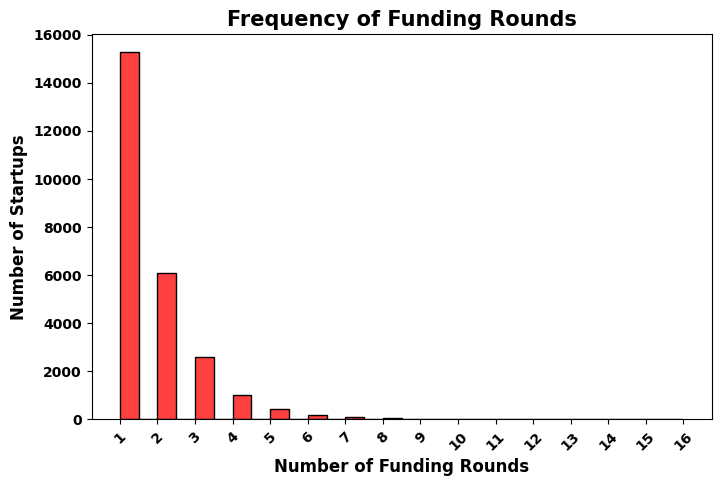

In [56]:
plt.figure(figsize=(8, 5))
sns.histplot(df_funded_clean['funding_rounds'], bins=30, color='red',kde= False)
plt.title('Frequency of Funding Rounds', fontsize=15, fontweight='bold')
plt.xlabel('Number of Funding Rounds', fontsize=12, fontweight='bold')
plt.ylabel('Number of Startups', fontsize=12, fontweight='bold')
# Convert years to integers
start_year = int(df_funded_clean['funding_rounds'].min())
end_year = int(df_funded_clean['funding_rounds'].max()) + 1
plt.yticks(fontsize=10, fontweight='bold')
# Set x-axis ticks at 1-year intervals
plt.xticks(
    ticks=range(start_year, end_year),
    rotation=45,fontweight='bold'
)
plt.show()

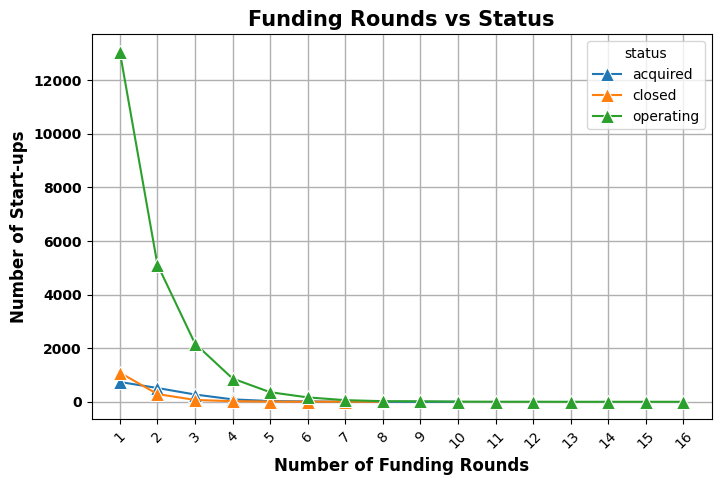

In [57]:
status_funding = df_funded_clean.groupby(['status', 'funding_rounds']).size().reset_index(name='count')

plt.figure(figsize=(8,5))
sns.lineplot(data=status_funding, x='funding_rounds', y='count', hue='status', marker ='^', markersize = 10)
plt.title('Funding Rounds vs Status', fontweight='bold', fontsize=15)
plt.xlabel('Number of Funding Rounds', fontweight='bold', fontsize=12)
plt.ylabel('Number of Start-ups', fontweight='bold', fontsize=12)
# Convert years to integers
start_year = int(df_funded_clean['funding_rounds'].min())
end_year = int(df_funded_clean['funding_rounds'].max()) + 1

# Set x-axis ticks at 1-year intervals
plt.xticks(
    ticks=range(start_year, end_year),
    rotation=45
)
plt.yticks(fontsize=10, fontweight='bold')

plt.grid(visible=True, which='both', linestyle='-', linewidth=1)
plt.show()

C:\Users\31602\AppData\Local\Temp\ipykernel_8888\2176726813.py:10: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  non_usa_yearly.groupby('founded_year')
C:\Users\31602\AppData\Local\Temp\ipykernel_8888\2176726813.py:20: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  usa_yearly.groupby('founded_year')


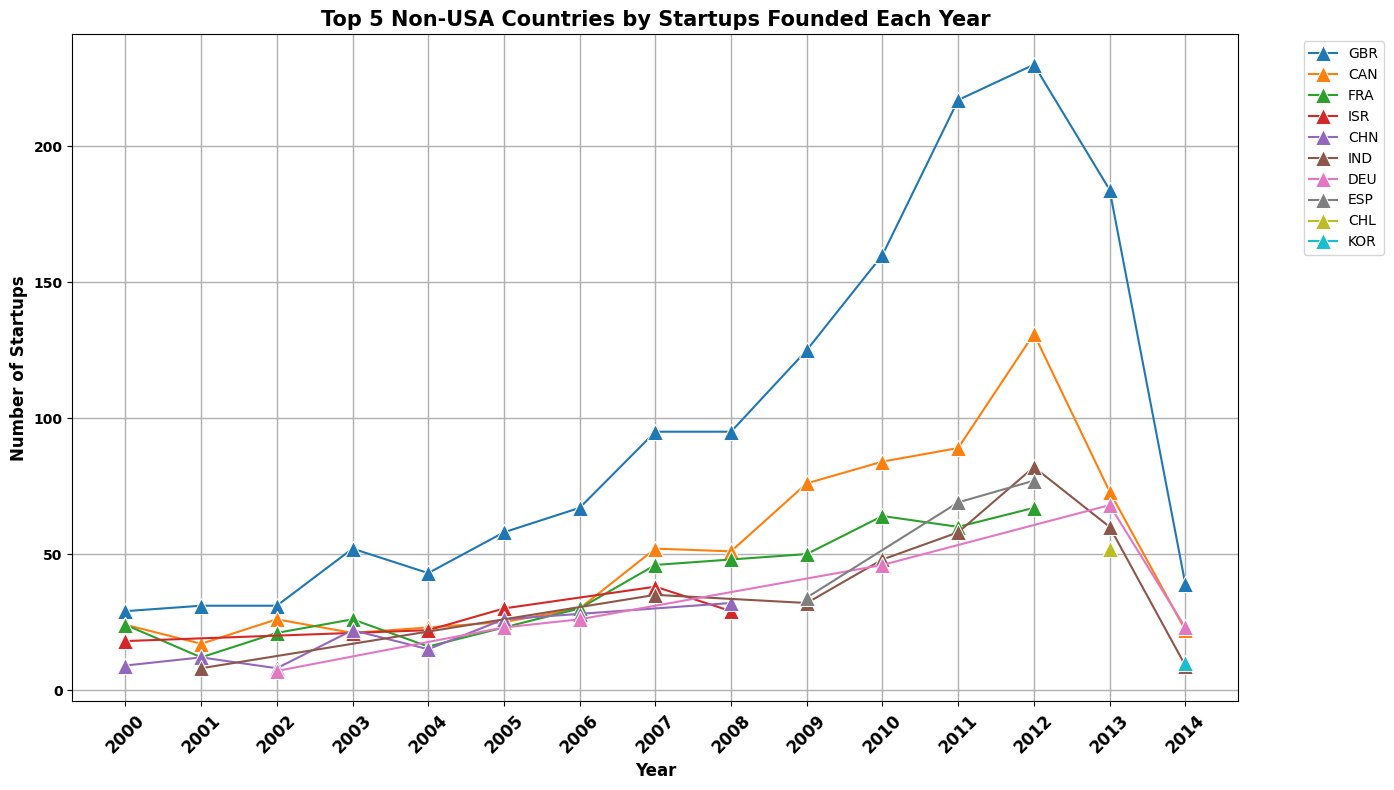

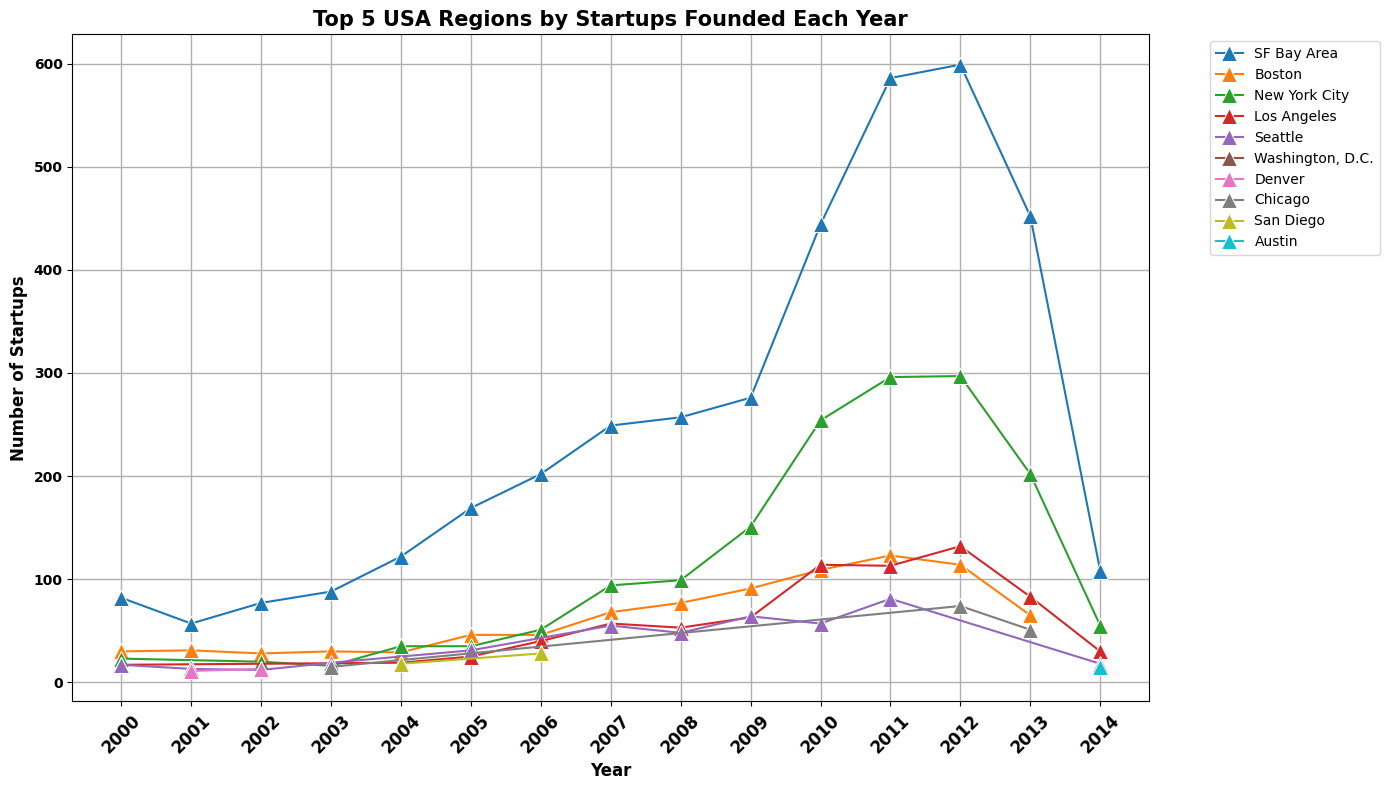

In [54]:
# Split the data into two subsets
non_usa_data = df_funded_clean[df_funded_clean['country_code'] != 'USA']
usa_data = df_funded_clean[df_funded_clean['country_code'] == 'USA']

# Top 5 countries (non-USA) each year
non_usa_yearly = (
    non_usa_data.groupby(['country_code', 'founded_year']).size().reset_index(name='startup_count')
)
top_countries_non_usa = (
    non_usa_yearly.groupby('founded_year')
    .apply(lambda x: x.nlargest(5, 'startup_count'))
    .reset_index(drop=True)
)

# Top 5 regions (USA) each year
usa_yearly = (
    usa_data.groupby(['region', 'founded_year']).size().reset_index(name='startup_count')
)
top_regions_usa = (
    usa_yearly.groupby('founded_year')
    .apply(lambda x: x.nlargest(5, 'startup_count'))
    .reset_index(drop=True)
)

# Plot for non-USA countries
plt.figure(figsize=(14, 8))
sns.lineplot(
    data=top_countries_non_usa, 
    x='founded_year', 
    y='startup_count', 
    hue='country_code', 
    marker='^', markersize=12
)
plt.title('Top 5 Non-USA Countries by Startups Founded Each Year', fontweight='bold', fontsize=15)
plt.xlabel('Year', fontsize=12, fontweight='bold')
plt.ylabel('Number of Startups', fontsize=12, fontweight='bold')
# Convert years to integers
start_year = int(df_funded_clean['founded_year'].min())
end_year = int(df_funded_clean['founded_year'].max()) + 1

# Set x-axis ticks at 1-year intervals
plt.xticks(
    ticks=range(start_year, end_year),
    rotation=45, fontweight='bold', fontsize=12
)


plt.yticks(fontsize=10, fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.grid(visible=True, which='both', linestyle='-', linewidth=1)
plt.show()

# Plot for USA regions
plt.figure(figsize=(14, 8))
sns.lineplot(
    data=top_regions_usa, 
    x='founded_year', 
    y='startup_count', 
    hue='region', 
    marker='^', markersize=12
)
plt.title('Top 5 USA Regions by Startups Founded Each Year', fontweight='bold', fontsize=15)
plt.xlabel('Year', fontsize=12, fontweight='bold')
plt.ylabel('Number of Startups', fontsize=12, fontweight='bold')

# Convert years to integers
start_year = int(df_funded_clean['founded_year'].min())
end_year = int(df_funded_clean['founded_year'].max()) + 1

# Set x-axis ticks at 1-year intervals
plt.xticks(
    ticks=range(start_year, end_year),
    rotation=45, fontweight='bold', fontsize=12
)

plt.yticks(fontsize=10, fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(visible=True, which='both', linestyle='-', linewidth=1)
plt.tight_layout()
plt.show()


In [49]:
# Exploding category_list column
df_funded_clean['category_list'] = df_funded_clean['category_list'].str.split('|')
df_exploded = df_funded_clean.explode('category_list')

# Combining categories
def combine_categories(category):
    if '3D ' in category:
        return '3D Technologies'
    elif 'Bio ' in category:
        return 'Biotechnology'
    elif category.startswith('Cloud'):
        return 'Cloud Technologies'
    elif category.startswith('Content '):
        return 'Content Management'
    elif category.lower().startswith('data'):
        return 'Data Management'
    elif 'Energy' in category:
        return 'Energy-related Tech'
    elif 'Health ' in category:
        return 'Healthcare-associated Services'
    elif category.startswith('Internet'):
        return 'Internet-associated Technology'
    elif category.startswith('Mobile'):
        return 'Mobile Devices/Apps/Associated Business'
    elif category.startswith('Social '):
        return 'Social Media and Associated Content Management'
    else:
        return category

df_exploded['category_list'] = df_exploded['category_list'].apply(lambda x: combine_categories(x) if pd.notna(x) else x)




C:\Users\31602\AppData\Local\Temp\ipykernel_8888\3697350229.py:9: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  categories_year.groupby('founded_year')
C:\Users\31602\AppData\Local\Temp\ipykernel_8888\3697350229.py:19: UserWarning: 
The palette list has fewer values (6) than needed (10) and will cycle, which may produce an uninterpretable plot.
  sns.lineplot(data=top_categories_per_year, x='founded_year', y='count', hue='category_list', marker='^', markersize=12,palette= tt1)


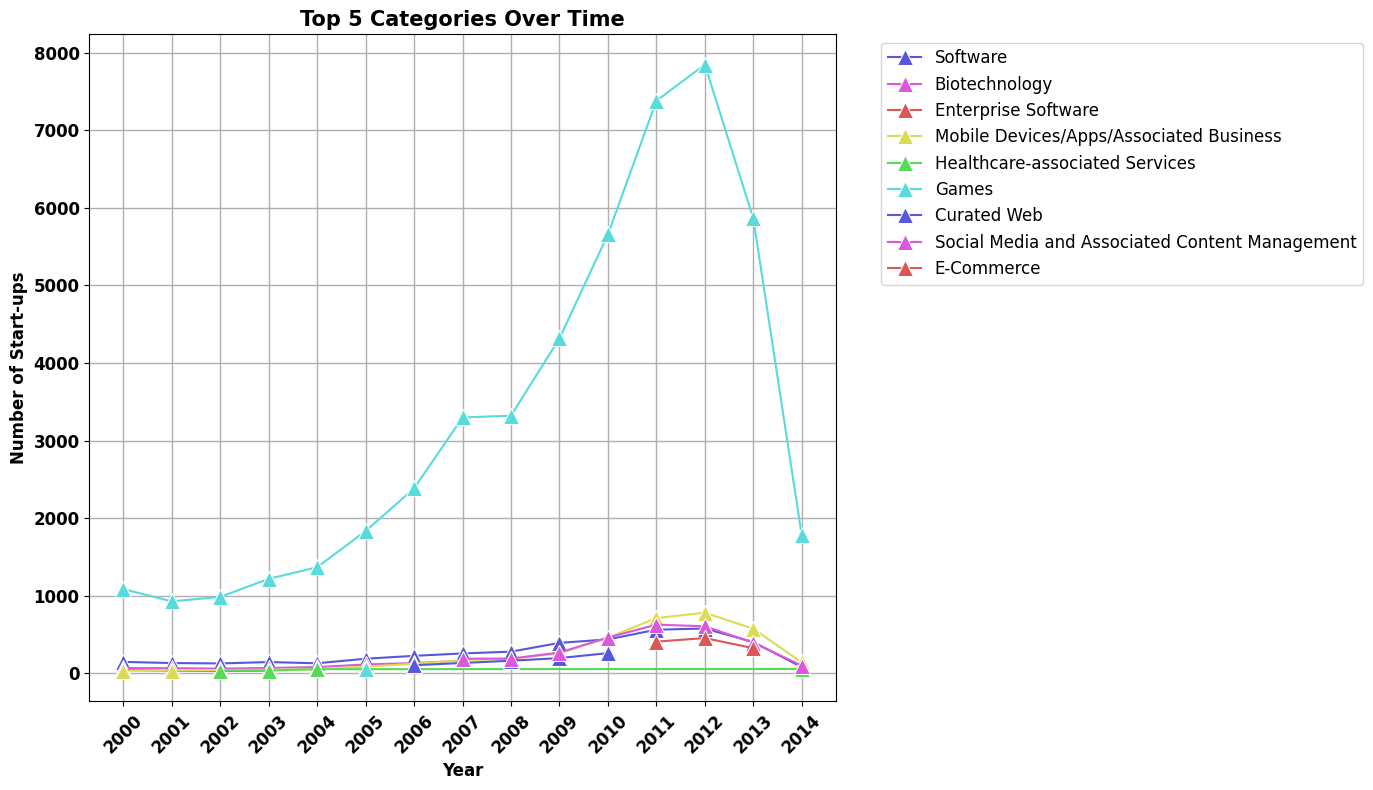

In [69]:
# Ensure E-Commerce is excluded from the exploded DataFrame
# df_exploded = df_exploded[df_exploded['category_list'] != 'E-Commerce']
tt1=sns.hls_palette(h=.5)
# Group by category and year, and get the counts
categories_year = df_exploded.groupby(['category_list', 'founded_year']).size().reset_index(name='count')

# Find the top 5 categories for each year
top_categories_per_year = (
    categories_year.groupby('founded_year')
    .apply(lambda x: x.nlargest(5, 'count'))
    .reset_index(drop=True)
)

# Check if E-Commerce is excluded from the aggregated data
# assert 'E-Commerce' not in top_categories_per_year['category_list'].unique(), "E-Commerce still exists in the data!"

# Plotting the top 5 categories per year
plt.figure(figsize=(14, 8))
sns.lineplot(data=top_categories_per_year, x='founded_year', y='count', hue='category_list', marker='^', markersize=12,palette= tt1)
plt.title('Top 5 Categories Over Time', fontweight='bold', fontsize=15)
plt.xlabel('Year', fontweight='bold', fontsize=12)
plt.ylabel('Number of Start-ups', fontweight='bold', fontsize=12)

# Convert years to integers
start_year = int(df_exploded['founded_year'].min())
end_year = int(df_exploded['founded_year'].max()) + 1

# Set x-axis ticks at 1-year intervals
plt.xticks(
    ticks=range(start_year, end_year),
    rotation=45, fontweight='bold', fontsize=12
)
plt.yticks(fontsize=12, fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12)
plt.grid(visible=True, which='both', linestyle='-', linewidth=1)

plt.tight_layout()
plt.show()


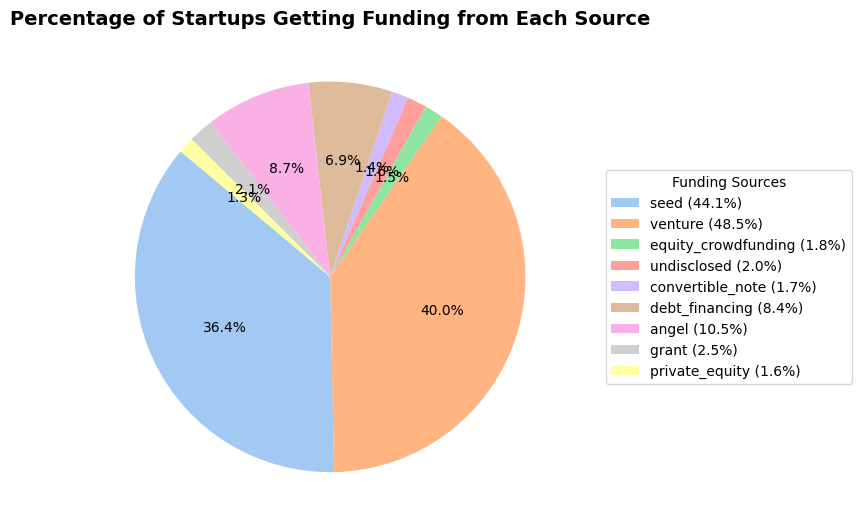

In [51]:
funding_sources = ['seed', 'venture', 'equity_crowdfunding', 'undisclosed', 'convertible_note', 
                   'debt_financing', 'angel', 'grant', 'private_equity']

# Count non-zero values for each funding source
funding_percentage = df_funded_clean[funding_sources].apply(lambda x: (x > 0).sum()) / len(df_funded_clean) * 100

# Define a custom color palette
custom_colors = sns.color_palette("pastel", len(funding_percentage))

# Create labels for the pie chart
labels = [f"{source} ({value:.1f}%)" for source, value in zip(funding_percentage.index, funding_percentage)]

# Plotting the pie chart
plt.figure(figsize=(8, 8))
patches, texts, autotexts = plt.pie(
    funding_percentage, 
    labels=None,  # Do not pass labels directly here; we'll handle them in the legend
    autopct='%1.1f%%', 
    startangle=140, 
    colors=custom_colors
)

# Adding a custom legend with formatted labels
plt.legend(patches, labels, title="Funding Sources", bbox_to_anchor=(1.05, 0.5), loc="center left", fontsize=10)

# Set title
plt.title('Percentage of Startups Getting Funding from Each Source',fontsize=14,fontweight='bold')
plt.tight_layout()
plt.show()
